In [68]:
import os

import matplotlib.pyplot as plt
import pandas as pd

In [69]:
DATA_DIR = "../Data"

Importing datasets

In [70]:
alt_rail_routes_unidirectional = pd.read_excel(os.path.join(DATA_DIR, "Alternative_Rail_Routes_Unidirectional.xlsx"))
population = pd.read_json(os.path.join(DATA_DIR, "europe-cities-by-population-2025.json"))

<h2>The biggest cities in Europe based on population</h2>
Using an additional dataset provided by World Population Review website, 12 biggest cities of Europe were extracted. For the purpose of travel time analysis, Kyiv, Moscow and St. Petersburg were removed due to Kyiv Airport being closed sinced 2022 and Russia not being included in the travel time dataset.


In [71]:
population.head(12)

,city,population,country,cca2,lat,lng,slug
0,Moscow,12737400,Russia,RU,55.7522,37.61560,NaN
1,Paris,11346800,France,FR,48.8534,2.34880,NaN
2,London,9840740,United Kingdom,GB,51.5085,-0.12574,NaN
3,Madrid,6810530,Spain,ES,40.4165,-3.70256,NaN
4,Barcelona,5733250,Spain,ES,41.3888,2.15899,NaN
5,Saint Petersburg,5597340,Russia,RU,59.9386,30.31410,NaN
6,Rome,4347100,Italy,IT,41.8919,12.51130,NaN
7,Berlin,3580190,Germany,DE,52.5244,13.41050,NaN
8,Milan,3167450,Italy,IT,45.4643,9.18951,NaN
9,Athens,3155320,Greece,GR,37.9795,23.71620,NaN


In [72]:
# Filtering out Russia and Ukraine.
# Kyiv's airport has been closed since 2022 and Russia is not included in the dataset
population = population[
    (population["country"] != "Russia") &
    (population["country"] != "Ukraine")
]

# Sort by population
population = population.sort_values(by="population", ascending=False)

# Take top 12 cities
cities_df = population[["city", "population", "country"]].head(12)

# Create a Python list of city names, and renaming Naples to Napoli, to match travel data
cities = cities_df["city"].tolist()
cities = ["Napoli" if c == "Naples" else c for c in cities]
cities

['Paris',
 'London',
 'Madrid',
 'Barcelona',
 'Rome',
 'Berlin',
 'Milan',
 'Athens',
 'Lisbon',
 'Manchester',
 'Birmingham',
 'Napoli']

In [73]:
def extract_city(value, cities):
    value = str(value).lower()
    for city in cities:
        if city.lower() in value:
            return city
    return None

Additinal columns `OriginCity` and `DestinationCity` are added to the Alternative_Rail_Routes_Unidirectional table by extracting names of the biggest cities from the airports' names in columns `Origin` and `Destination`. Rows that did not contain name of any of twelve cities were dropped.

In [74]:
alt_rail_routes_unidirectional["OriginCity"] = alt_rail_routes_unidirectional["Origin"].apply(lambda x: extract_city(x, cities))
alt_rail_routes_unidirectional["DestinationCity"] = alt_rail_routes_unidirectional["Destination"].apply(lambda x: extract_city(x, cities))

alt_rail_routes_unidirectional[["Origin", "OriginCity"]].drop_duplicates().head(20)

,Origin,OriginCity
0,A Coruña,None
6,Aalborg Airport,None
23,Málaga-Costa del Sol Airport,None
169,Amsterdam Airport Schiphol,None
317,Marche Airport,None
332,Stockholm-Arlanda Airport,None
460,Athens International Airport,Athens
574,Aalborg,None
580,Aarhus,None
586,Aberdeen,None


In [75]:
alt_rail_routes_unidirectional[["Destination", "DestinationCity"]].drop_duplicates().head(20)

,Destination,DestinationCity
0,Málaga-Costa del Sol Airport,None
1,Barcelona-El Prat Airport,Barcelona
2,Geneva Cointrin International Airport,None
3,London Gatwick Airport,London
4,Madrid–Barajas Airport,Madrid
5,Milan Malpensa International Airport,Milan
7,Amsterdam Airport Schiphol,None
8,Alicante,None
9,Amsterdam,None
11,Barcelona,Barcelona


In [76]:
city_routes = alt_rail_routes_unidirectional[
    alt_rail_routes_unidirectional["OriginCity"].notna() &
    alt_rail_routes_unidirectional["DestinationCity"].notna()
].copy()

city_routes

,Route Name,Origin,Destination,Origin Coordinates,Destination Coordinates,Rail Theoretical Travel Time,Rail Service Travel Time,Air Travel Time,Valued Air Travel Time,Valued Air Travel Time_MIN,...,Theoretical Time Difference_MAX,Service Time Difference_MAX,Theoretical Time Increase,Service Time Increase,Theoretical Time Increase_MIN,Service Time Increase_MIN,Theoretical Time Increase_MAX,Service Time Increase_MAX,OriginCity,DestinationCity
465,ATH-BCN,Athens International Airport,Barcelona-El Prat Airport,"37.936947,23.944620","41.304141,2.073126",2220.0,NaN,193.030576,312.709532,272.173112,...,-1866.754047,NaN,609.923993,NaN,715.657354,NaN,528.457306,NaN,Athens,Barcelona
466,ATH-BER,Athens International Airport,Berlin Brandenburg Airport,"37.936947,23.944620","52.364284,13.508157",1920.0,NaN,174.828851,283.222738,246.508680,...,-1600.063203,NaN,577.911672,NaN,678.877240,NaN,500.118529,NaN,Athens,Berlin
467,ATH-BHX,Athens International Airport,Birmingham International Airport,"37.936947,23.944620","52.450824,-1.725336",2160.0,NaN,235.704698,381.841611,332.343624,...,-1728.660403,NaN,465.679575,NaN,549.929724,NaN,400.765525,NaN,Athens,Birmingham
470,ATH-Barcelona,Athens International Airport,Barcelona,"37.936947,23.944620","41.378911,2.140367",2220.0,NaN,193.030576,312.709532,272.173112,...,-1866.754047,NaN,609.923993,NaN,715.657354,NaN,528.457306,NaN,Athens,Barcelona
474,ATH-Berlin,Athens International Airport,Berlin,"37.936947,23.944620","52.525589,13.369548",1920.0,NaN,174.828851,283.222738,246.508680,...,-1600.063203,NaN,577.911672,NaN,678.877240,NaN,500.118529,NaN,Athens,Berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5959,STN-MXP,London Stansted Airport,Milan Malpensa International Airport,"51.889260,0.262154","45.627093,8.711347",457.0,801.0,116.051873,188.004035,163.633141,...,-244.625072,-588.625072,143.079890,326.054686,179.283278,389.50964,115.185476,277.163165,London,Milan
5960,STN-Madrid,London Stansted Airport,Madrid,"51.889260,0.262154","40.405963,-3.689757",597.0,NaN,148.049383,239.840000,208.749630,...,-326.069630,NaN,148.915944,NaN,185.988531,NaN,120.351819,NaN,London,Madrid
5963,STN-Milan,London Stansted Airport,Milan,"51.889260,0.262154","45.487143,9.204828",446.0,NaN,115.527917,187.155226,162.894364,...,-234.583911,NaN,138.304860,NaN,173.797073,NaN,110.958401,NaN,London,Milan
5968,STN-Napoli,London Stansted Airport,Napoli,"51.889260,0.262154","40.852826,14.273072",634.0,NaN,159.397482,258.223921,224.750450,...,-342.302608,NaN,145.523342,NaN,182.090648,NaN,117.348532,NaN,London,Napoli


In [77]:
city_routes['DestinationCity'].unique()

array(['Barcelona', 'Berlin', 'Birmingham', 'Rome', 'London', 'Lisbon',
       'Madrid', 'Manchester', 'Milan', 'Napoli', 'Paris', 'Athens'],
      dtype=object)

In [78]:
city_routes['OriginCity'].unique()

array(['Athens', 'Barcelona', 'Berlin', 'Birmingham', 'Rome', 'London',
       'Lisbon', 'Madrid', 'Manchester', 'Milan', 'Napoli', 'Paris'],
      dtype=object)

The Alternative_Rail_Routes_Unidirectional table contained duplicate rows due to certain cities having more than one airport connection. To remove duplicate routes between two cities, rows were aggregated and the shortest travel times and service time difference were kept, while others were dropped. This decision was made due to the expectation that travelers will prefer faster, rather than longer travel.

In [79]:
city_routes = city_routes[
    city_routes["OriginCity"] != city_routes["DestinationCity"]
]
city_routes[["OriginCity", "DestinationCity"]].shape

(313, 2)

In [80]:
city_routes[city_routes['OriginCity'] == "London"].head(10)

,Route Name,Origin,Destination,Origin Coordinates,Destination Coordinates,Rail Theoretical Travel Time,Rail Service Travel Time,Air Travel Time,Valued Air Travel Time,Valued Air Travel Time_MIN,...,Theoretical Time Difference_MAX,Service Time Difference_MAX,Theoretical Time Increase,Service Time Increase,Theoretical Time Increase_MIN,Service Time Increase_MIN,Theoretical Time Increase_MAX,Service Time Increase_MAX,OriginCity,DestinationCity
3842,LGW-ATH,London Gatwick Airport,Athens International Airport,"51.156735,-0.160922","37.936947,23.944620",2280.0,NaN,220.865786,357.802573,311.420758,...,-1875.815612,NaN,537.222919,NaN,632.128460,NaN,464.098977,NaN,London,Athens
3848,LGW-Athens,London Gatwick Airport,Athens,"51.156735,-0.160922","37.992323,23.720781",2280.0,NaN,220.865786,357.802573,311.420758,...,-1875.815612,NaN,537.222919,NaN,632.128460,NaN,464.098977,NaN,London,Athens
3849,LGW-BCN,London Gatwick Airport,Barcelona-El Prat Airport,"51.156735,-0.160922","41.304141,2.073126",449.0,761.0,128.954289,208.905947,181.825547,...,-213.013652,-525.013652,114.929257,264.278762,146.939997,318.533046,90.265244,222.476282,London,Barcelona
3850,LGW-BER,London Gatwick Airport,Berlin Brandenburg Airport,"51.156735,-0.160922","52.364284,13.508157",432.0,760.0,113.381001,183.677222,159.867211,...,-224.512768,-552.512768,135.195195,313.769325,170.224267,375.394543,108.205583,266.287599,London,Berlin
3852,LGW-Barcelona,London Gatwick Airport,Barcelona,"51.156735,-0.160922","41.378911,2.140367",441.0,719.0,128.954289,208.905947,181.825547,...,-205.013652,-483.013652,111.099782,244.174021,142.540175,295.433982,86.875217,204.678642,London,Barcelona
3856,LGW-Berlin,London Gatwick Airport,Berlin,"51.156735,-0.160922","52.525589,13.369548",404.0,705.0,113.381001,183.677222,159.867211,...,-196.512768,-497.512768,119.951062,283.825492,152.709731,340.990991,94.710776,239.779944,London,Berlin
3872,LGW-FCO,London Gatwick Airport,Rome–Fiumicino International Airport,"51.156735,-0.160922","41.793437,12.252024",589.0,983.0,150.480315,243.778110,212.177244,...,-313.621024,-707.621024,141.613162,303.235549,177.598101,363.291907,113.887061,256.962617,London,Rome
3896,LGW-Lisbon,London Gatwick Airport,Lisbon,"51.156735,-0.160922","38.71387,-9.122271",1091.0,NaN,166.379097,269.534137,234.594527,...,-786.526252,NaN,304.772476,NaN,365.057738,NaN,258.323175,NaN,London,Lisbon
3899,LGW-MAD,London Gatwick Airport,Madrid–Barajas Airport,"51.156735,-0.160922","40.492435,-3.592839",655.0,1021.0,148.910418,241.234877,209.963689,...,-382.493936,-748.493936,171.519611,323.238967,211.958703,386.274558,140.361623,274.670561,London,Madrid
3901,LGW-MXP,London Gatwick Airport,Milan Malpensa International Airport,"51.156735,-0.160922","45.627093,8.711347",446.0,799.0,116.290687,188.390913,163.969869,...,-233.188042,-586.188042,136.741779,324.118120,172.001193,387.284649,109.574690,275.448828,London,Milan


In [81]:
city_routes = city_routes.groupby(["OriginCity", "DestinationCity"]).agg({
    "Valued Air Travel Time": "min",
    "Rail Service Travel Time": "min",
    "Service Time Difference": "min"
}).reset_index()

city_routes.shape

(122, 5)

In [82]:
city_routes

,OriginCity,DestinationCity,Valued Air Travel Time,Rail Service Travel Time,Service Time Difference
0,Athens,Barcelona,312.709532,NaN,NaN
1,Athens,Berlin,283.222738,NaN,NaN
2,Athens,Birmingham,381.841611,NaN,NaN
3,Athens,Lisbon,434.481722,NaN,NaN
4,Athens,London,374.229979,NaN,NaN
...,...,...,...,...,...
117,Rome,Madrid,253.364808,1263.0,-1009.635192
118,Rome,Manchester,281.513884,1123.0,-826.038028
119,Rome,Milan,114.534000,220.0,-183.466000
120,Rome,Napoli,84.722671,115.0,-30.277329


<h3>Exploration and Visualization

In [83]:
city_routes[city_routes["Service Time Difference"]>0]

,OriginCity,DestinationCity,Valued Air Travel Time,Rail Service Travel Time,Service Time Difference


In [84]:
city_routes["Service Time Difference"].describe()

count      82.000000
mean     -649.948281
std       366.754768
min     -2001.795544
25%      -858.506707
50%      -708.862750
75%      -396.671712
max       -30.277329
Name: Service Time Difference, dtype: float64

In [85]:
close_30 = city_routes[
    city_routes["Service Time Difference"] > -30
]

close_60 = city_routes[
    city_routes["Service Time Difference"] > -60
]

In [86]:
close_30

,OriginCity,DestinationCity,Valued Air Travel Time,Rail Service Travel Time,Service Time Difference


In [87]:
close_60

,OriginCity,DestinationCity,Valued Air Travel Time,Rail Service Travel Time,Service Time Difference
101,Napoli,Rome,87.083333,127.0,-39.916667
120,Rome,Napoli,84.722671,115.0,-30.277329


In [88]:
city_routes[city_routes['Service Time Difference'] < -1500]

,OriginCity,DestinationCity,Valued Air Travel Time,Rail Service Travel Time,Service Time Difference
49,Lisbon,Milan,260.760759,2259.0,-1998.239241
86,Milan,Lisbon,282.204456,2284.0,-2001.795544


C:\Users\Meliha\AppData\Local\Temp\ipykernel_15368\3525822563.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


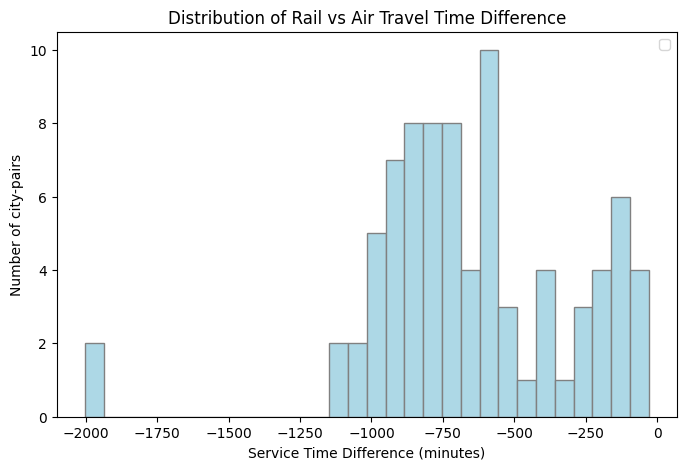

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.hist(city_routes["Service Time Difference"], bins=30, edgecolor="grey", color="lightblue")
plt.xlabel("Service Time Difference (minutes)")
plt.ylabel("Number of city-pairs")
plt.title("Distribution of Rail vs Air Travel Time Difference")
plt.legend()
plt.show()


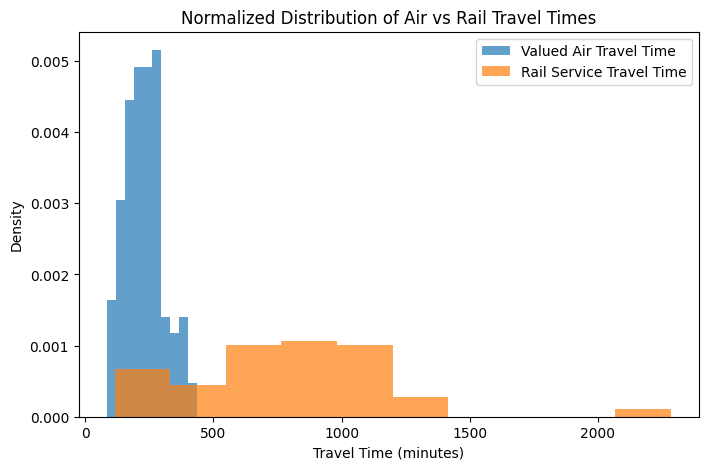

In [90]:
plt.figure(figsize=(8,5))

plt.hist(
    city_routes["Valued Air Travel Time"],
    bins=10,
    alpha=0.7,
    density=True,
    label="Valued Air Travel Time"
)

plt.hist(
    city_routes["Rail Service Travel Time"],
    bins=10,
    alpha=0.7,
    density=True,
    label="Rail Service Travel Time"
)

plt.xlabel("Travel Time (minutes)")
plt.ylabel("Density")
plt.title("Normalized Distribution of Air vs Rail Travel Times")
plt.legend()
plt.show()


In [91]:
no_rail = city_routes[
    city_routes["Rail Service Travel Time"].isna()
][["OriginCity", "DestinationCity"]].drop_duplicates()

city_routes["CityPair"] = city_routes.apply(
    lambda x: " – ".join(sorted([x["OriginCity"], x["DestinationCity"]])),
    axis=1
)

no_rail_unique = no_rail.copy()

no_rail_unique["CityPair"] = no_rail_unique.apply(
    lambda x: " – ".join(sorted([x["OriginCity"], x["DestinationCity"]])),
    axis=1
)

no_rail_unique = no_rail_unique.drop_duplicates("CityPair")

no_rail_unique

,OriginCity,DestinationCity,CityPair
0,Athens,Barcelona,Athens – Barcelona
1,Athens,Berlin,Athens – Berlin
2,Athens,Birmingham,Athens – Birmingham
3,Athens,Lisbon,Athens – Lisbon
4,Athens,London,Athens – London
5,Athens,Madrid,Athens – Madrid
6,Athens,Manchester,Athens – Manchester
7,Athens,Milan,Athens – Milan
8,Athens,Napoli,Athens – Napoli
9,Athens,Paris,Athens – Paris


<h3>Conclusion and Results</h3>
Due to big geographical distances between big European cities, Air Travel is prefered in this case. It can be seen that for the twelve chosen big European cities, Service Time Difference is always negative, due to Rail Travel Time being always longer than Valued Air Travel Time.
There is only one route between two big cities where Rail does not take 1 hour more than Air Travel. That route is between Rome and Napoli, both located in Italy. <br>
It is important to mention that not all of the chosen cities are connected with rail. For example, Athens is not connected to any other city. 
The biggest difference between Rail and Air Travel Times is on the route between Lisbon and Milan, where Rail Travel takes around 30 hours longer.